In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [32]:
# Step 1: Load your dataset
df = pd.read_csv("cleaned_finance_data.csv")  # Replace with your actual file name

# Step 2: Define the label-to-name mapping
label_map = {0: 'Dow Jones(label_0)', 1: 'NASDAQ(label_1)', 2: 'S&P 500(label_2)'}

# Step 3: Filter and save each group to its corresponding name
for label, name in label_map.items():
    filtered_df = df[df['Stock Index'] == label]
    output_filename = f"{name}.csv"
    filtered_df.to_csv(output_filename, index=False)
    print(f"Saved: {output_filename}")


Saved: Dow Jones(label_0).csv
Saved: NASDAQ(label_1).csv
Saved: S&P 500(label_2).csv


In [33]:
import pandas as pd

# Load your file
df = pd.read_csv("cleaned_finance_data.csv")

# Define label mapping
label_map = {0: 'Dow Jones', 1: 'NASDAQ', 2: 'S&P 500'}

# Function to create summary including 'median' label
def custom_summary(df):
    summary = pd.DataFrame()
    summary['count'] = df.count(numeric_only=True)
    summary['mean'] = df.mean(numeric_only=True)
    summary['std'] = df.std(numeric_only=True)
    summary['min'] = df.min(numeric_only=True)
    summary['25%'] = df.quantile(0.25, numeric_only=True)
    summary['median'] = df.median(numeric_only=True)
    summary['75%'] = df.quantile(0.75, numeric_only=True)
    summary['max'] = df.max(numeric_only=True)
    return summary.T  # Transpose for readability (rows = stats, columns = features)

# Full dataset summary
print("📊 Summary for Entire Dataset:")
full_summary = custom_summary(df)
print(full_summary)
full_summary.to_csv("Full_Dataset_Summary.csv")

# Grouped summaries
for label, name in label_map.items():
    group_df = df[df['Stock Index'] == label]
    group_summary = custom_summary(group_df)
    group_summary.to_csv(f"{name}_summary.csv")
    print(f"✅ Saved: {name}_summary.csv")


📊 Summary for Entire Dataset:
        Stock Index   Open Price  Close Price   Daily High   Daily Low  \
count   3000.000000  3000.000000  3000.000000  3000.000000  3000.00000   
mean       1.026333  2982.094607  2981.249173  3018.887777  2944.32975   
std        0.814777  1151.862689  1151.783841  1151.683485  1151.83490   
min        0.000000  1000.050000   954.520000  1012.130000   917.17000   
25%        0.000000  1994.982500  1997.425000  2035.952500  1955.39750   
median     1.000000  2970.780000  2977.180000  3006.520000  2939.24500   
75%        2.000000  3974.690000  3982.082500  4015.217500  3934.08750   
max        2.000000  4998.230000  5034.130000  5076.190000  4977.06000   

        Trading Volume  GDP Growth (%)  Inflation Rate (%)  \
count     3.000000e+03     3000.000000         3000.000000   
mean      5.033864e+08        2.608903            5.096830   
std       2.859004e+08        4.287337            2.910513   
min       1.636024e+06       -5.000000            0.010

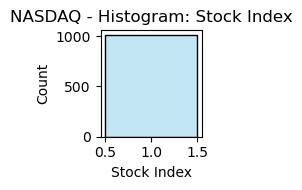

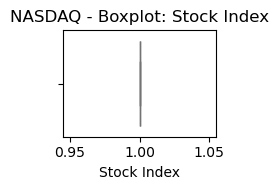

✅ Saved histogram and boxplot for: Stock Index


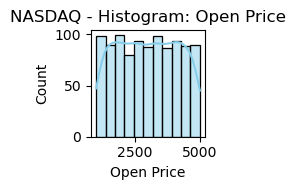

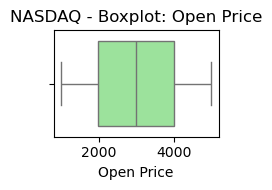

✅ Saved histogram and boxplot for: Open Price


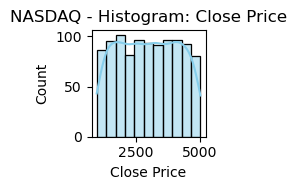

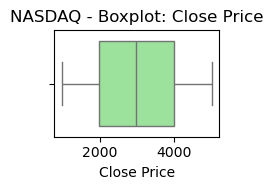

✅ Saved histogram and boxplot for: Close Price


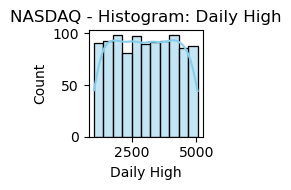

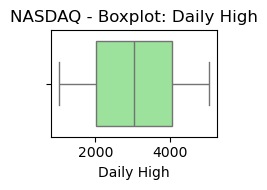

✅ Saved histogram and boxplot for: Daily High


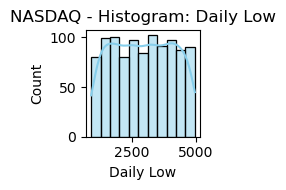

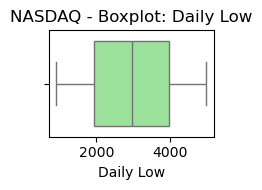

✅ Saved histogram and boxplot for: Daily Low


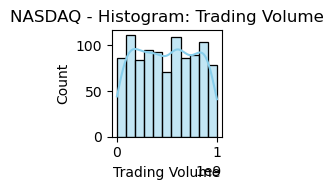

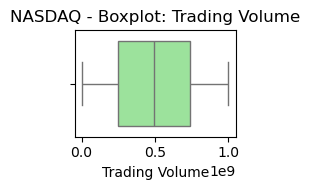

✅ Saved histogram and boxplot for: Trading Volume


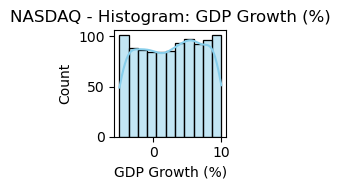

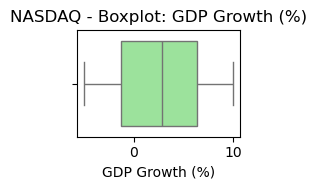

✅ Saved histogram and boxplot for: GDP Growth (%)


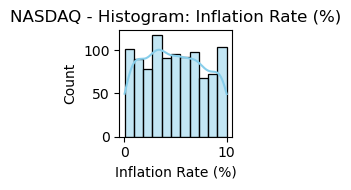

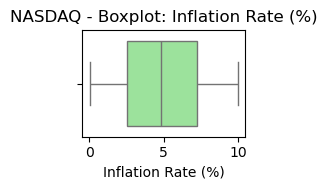

✅ Saved histogram and boxplot for: Inflation Rate (%)


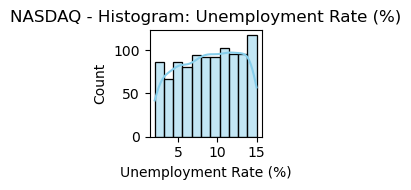

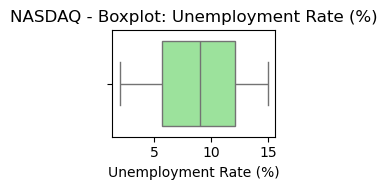

✅ Saved histogram and boxplot for: Unemployment Rate (%)


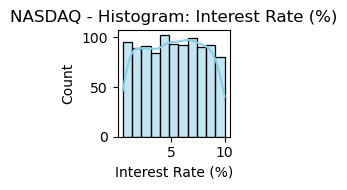

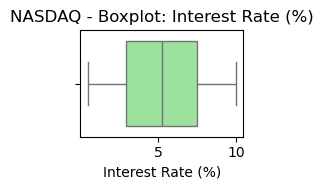

✅ Saved histogram and boxplot for: Interest Rate (%)


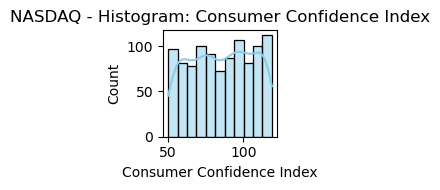

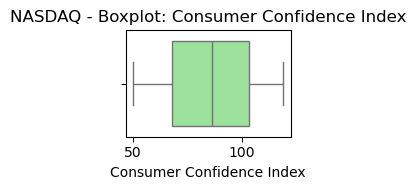

✅ Saved histogram and boxplot for: Consumer Confidence Index


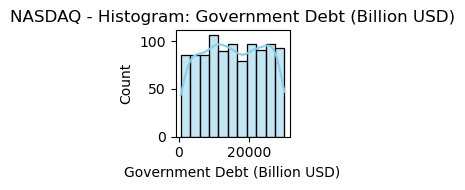

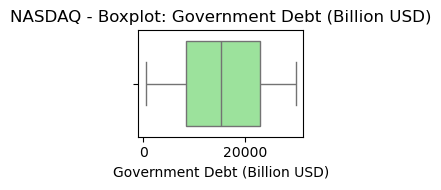

✅ Saved histogram and boxplot for: Government Debt (Billion USD)


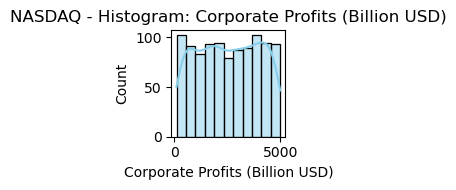

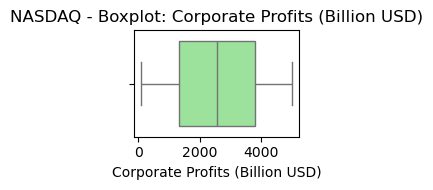

✅ Saved histogram and boxplot for: Corporate Profits (Billion USD)


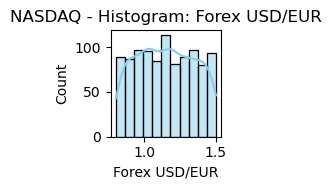

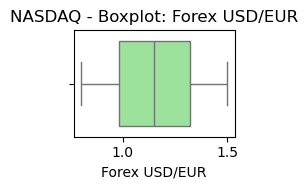

✅ Saved histogram and boxplot for: Forex USD/EUR


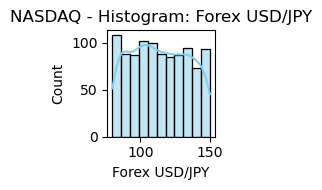

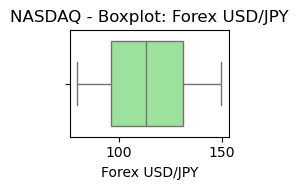

✅ Saved histogram and boxplot for: Forex USD/JPY


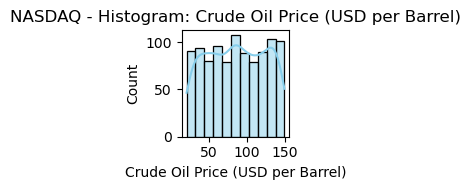

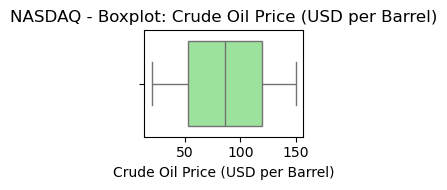

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

# ---------- Config ----------
file_path = "NASDAQ(label_1).csv"
output_folder = "nasdaq_outputs"
os.makedirs(output_folder, exist_ok=True)

def sanitize_filename(name):
    return re.sub(r'[\\/*?:"<>|]', "_", name)

# ---------- Load Data ----------
df = pd.read_csv(file_path)
numeric_df = df.select_dtypes(include='number')

# ---------- Plotting ----------
for col in numeric_df.columns:
    # Histogram
    plt.figure(figsize=(2, 2))
    sns.histplot(df[col].dropna(), kde=True, color='skyblue')
    plt.title(f"NASDAQ - Histogram: {col}")
    plt.xlabel(col)
    plt.tight_layout()
    hist_file = os.path.join(output_folder, sanitize_filename(f"{col}_histogram.png"))
    plt.savefig(hist_file)
    plt.show()
    plt.close()
    

    # Boxplot
    plt.figure(figsize=(2,2))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"NASDAQ - Boxplot: {col}")
    plt.tight_layout()
    box_file = os.path.join(output_folder, sanitize_filename(f"{col}_boxplot.png"))
    plt.savefig(box_file)
    plt.show()
    plt.close()
   

    print(f"✅ Saved histogram and boxplot for: {col}")


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from itertools import combinations

# ---------- SETTINGS ----------
input_file = "NASDAQ(label_1).csv"
output_folder = "nasdaq_pairwise_scatterplots"

# ---------- Utility Functions ----------
def sanitize_filename(name):
    return re.sub(r'[\\/*?:"<>|]', "_", name)

# Create the output folder
os.makedirs(output_folder, exist_ok=True)

# ---------- Load Data ----------
df = pd.read_csv(input_file)
numeric_df = df.select_dtypes(include='number').dropna()

# ---------- Generate All Feature Pairs ----------
feature_pairs = list(combinations(numeric_df.columns, 2))

# ---------- Create and Save Plots ----------
for x_col, y_col in feature_pairs:
    plt.figure(figsize=(4, 4))
    
    # Plot with regression line (optional: switch to scatterplot if needed)
    sns.regplot(data=numeric_df, x=x_col, y=y_col,
                scatter_kws={'alpha': 0.6, 's': 40},
                line_kws={"color": "red"})

    plt.title(f"{x_col} vs {y_col}")
    plt.tight_layout()

    # Safe filename
    filename = f"{sanitize_filename(x_col)}_vs_{sanitize_filename(y_col)}.png"
    filepath = os.path.join(output_folder, filename)

    # Ensure directory exists
    os.makedirs(os.path.dirname(filepath), exist_ok=True)

    # Save and Show
    plt.savefig(filepath)
    plt.show()
    plt.close()

    print(f"✅ Saved and displayed: {filepath}")


In [ ]:
import pandas as pd

# Load your CSV
df = pd.read_csv("NASDAQ(label_1).csv")  # or your actual file name

# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop any rows with invalid or missing dates
df.dropna(subset=['Date'], inplace=True)

# Create a new column for Year-Month
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group by Year-Month and calculate mean for numeric columns
monthly_avg = df.groupby('YearMonth').mean(numeric_only=True)

# Optional: convert YearMonth back to timestamp for plotting
monthly_avg.index = monthly_avg.index.to_timestamp()

# Save to new CSV (optional)
monthly_avg.to_csv("NASDAQ_monthly_avg.csv")

# Preview
print(monthly_avg.head())


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# ---------- Load Monthly Averaged Data ----------
monthly_df = pd.read_csv("NASDAQ_monthly_avg.csv")

# Optional: Convert index to datetime if it's a column
if 'YearMonth' in monthly_df.columns:
    monthly_df['YearMonth'] = pd.to_datetime(monthly_df['YearMonth'])

# ---------- Output Folder ----------
output_folder = "nasdaq_monthly_relationship_plots"
os.makedirs(output_folder, exist_ok=True)

# ---------- Select Numeric Features ----------
numeric_df = monthly_df.select_dtypes(include='number').dropna()

# ---------- 1. Correlation Matrix + Heatmap ----------
corr = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("NASDAQ Monthly Average - Correlation Matrix")
heatmap_path = os.path.join(output_folder, "nasdaq_monthly_correlation_heatmap.png")
plt.savefig(heatmap_path)
plt.show()
plt.close()

# ---------- 2. Pairplot ----------
pairplot = sns.pairplot(numeric_df, corner=True, plot_kws={"alpha": 0.6, "s": 40})
pairplot.fig.suptitle("NASDAQ Monthly Average - Pairwise Relationships", y=1.02)
pairplot_path = os.path.join(output_folder, "nasdaq_monthly_pairplot.png")
pairplot.savefig(pairplot_path)
print(f"✅ Saved heatmap and pairplot to: {output_folder}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import os
import re

# ---------- Step 1: Load Data ----------
df = pd.read_csv("NASDAQ_monthly_avg.csv")

# Convert 'YearMonth' to datetime and set as index if available
if 'YearMonth' in df.columns:
    df['YearMonth'] = pd.to_datetime(df['YearMonth'])
    df.set_index('YearMonth', inplace=True)

# ---------- Step 2: Output Setup ----------
output_folder = "nasdaq_trend_anomaly"
os.makedirs(output_folder, exist_ok=True)

# Helper to sanitize file names
def sanitize(name):
    return re.sub(r'[\\/*?:"<>|]', "_", name)

# ---------- Step 3: Analyze Each Feature ----------
summary = []

for col in df.select_dtypes(include='number').columns:
    series = df[col].ffill()  # ✅ updated to avoid FutureWarning

    # --- Trend Detection ---
    slope = np.polyfit(range(len(series)), series, 1)[0]
    if slope > 0.01:
        trend = "↑ Increasing"
    elif slope < -0.01:
        trend = "↓ Decreasing"
    else:
        trend = "↔ Stable"

    # --- Outlier Detection ---
    z_scores = zscore(series)
    outliers = np.abs(z_scores) > 3
    outlier_count = outliers.sum()

    # --- Plot: Trend + Outliers ---
    plt.figure(figsize=(10, 4))
    plt.plot(series.index, series, marker='o', label="Monthly Avg")
    plt.scatter(series.index[outliers], series[outliers], color='red', label="Outliers", zorder=5)
    plt.title(f"{col} - Trend: {trend} | Outliers: {outlier_count}")
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    # Build and sanitize path
    safe_name = sanitize(col)
    filepath = os.path.join(output_folder, f"{safe_name}_trend_outliers.png")
    os.makedirs(os.path.dirname(filepath), exist_ok=True)  # ✅ ensure folder exists
    plt.savefig(filepath)
    plt.show()
    plt.close()

    # Add to summary
    summary.append({
        "Feature": col,
        "Trend": trend,
        "Outliers Found": int(outlier_count)
    })

# ---------- Step 4: Save Summary ----------
summary_df = pd.DataFrame(summary)
summary_csv_path = os.path.join(output_folder, "nasdaq_trend_summary.csv")
summary_df.to_csv(summary_csv_path, index=False)

print(f"✅ All plots and trend summary saved in: {output_folder}")
